<h2>Project 2: GODIGT Bank</h2>

<h3>Bank Main Objective: The bank wants customers that show higher intent towards a recommended credit card.<br> (Higher
intent means consumers would want to use the card and hence not be attrite.)</h3>

In [1]:
# importing all python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\1622264721.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
bank=pd.read_csv("godigt_cc_data.csv") 

# Opening Dataset in python

<h3>Checking Size and Data types of All Columns</h3>

In [3]:
bank.shape  

# dataset has 8448 rows and 29 columns

(8448, 29)

In [4]:
bank.info()

# The dataset has 17 integer, 1 decimal and 11 object type data type columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   userid                     8448 non-null   int64  
 1   card_no                    8448 non-null   object 
 2   card_bin_no                8448 non-null   int64  
 3   Issuer                     8448 non-null   object 
 4   card_type                  8448 non-null   object 
 5   card_source_date           8448 non-null   object 
 6   high_networth              8448 non-null   object 
 7   active_30                  8448 non-null   int64  
 8   active_60                  8448 non-null   int64  
 9   active_90                  8448 non-null   int64  
 10  cc_active30                8448 non-null   int64  
 11  cc_active60                8448 non-null   int64  
 12  cc_active90                8448 non-null   int64  
 13  hotlist_flag               8448 non-null   objec

In [5]:
bank.head() # We want to check values in all the columns

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Unnamed: 28
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,...,0,0,0,0,0,T,"27,729",Self Employed,290000,NaN
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,...,0,0,0,0,0,R,"2,80,854",0,950000,NaN
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,...,1,0,0,0,0,R,"70,587",Student,210000,NaN
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,...,0,0,1,0,0,T,"9,156",Self Employed,80000,NaN
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,...,1,0,0,0,0,T,"38,108",Salaried,220000,NaN


<h3>Starting : Preliminary analysis & Removal of Discrepancies in Dataset</h3>

In [6]:
bank.isnull().sum() # Checking if our dataset has null values

userid                          0
card_no                         0
card_bin_no                     0
Issuer                          0
card_type                       0
card_source_date                0
high_networth                   0
active_30                       0
active_60                       0
active_90                       0
cc_active30                     0
cc_active60                     0
cc_active90                     0
hotlist_flag                    0
widget_products                 0
engagement_products             0
 annual_income_at_source        0
other_bank_cc_holding           0
bank_vintage                    0
T+1_month_activity              0
T+2_month_activity              0
T+3_month_activity              0
T+6_month_activity              0
T+12_month_activity             0
Transactor_revolver            38
 avg_spends_l3m                 0
Occupation_at_source            0
cc_limit                        0
Unnamed: 28                  8448
dtype: int64

In [7]:
bank.drop(['Unnamed: 28'],axis=1,inplace=True) #deleted "Unnmaed: 28" column which has unnnecessary null values. 

In [8]:
bank.columns # Again checking all columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       ' annual_income_at_source ', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       ' avg_spends_l3m ', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [9]:
bank.isnull().sum() 
# checking again null values in columns
# Column Name "Transactor_revolver" has 38 null values

userid                        0
card_no                       0
card_bin_no                   0
Issuer                        0
card_type                     0
card_source_date              0
high_networth                 0
active_30                     0
active_60                     0
active_90                     0
cc_active30                   0
cc_active60                   0
cc_active90                   0
hotlist_flag                  0
widget_products               0
engagement_products           0
 annual_income_at_source      0
other_bank_cc_holding         0
bank_vintage                  0
T+1_month_activity            0
T+2_month_activity            0
T+3_month_activity            0
T+6_month_activity            0
T+12_month_activity           0
Transactor_revolver          38
 avg_spends_l3m               0
Occupation_at_source          0
cc_limit                      0
dtype: int64

In [10]:
bank['Transactor_revolver'].unique() 

# Checking unique values in "Transactor_revolver" Column.

array(['T', 'R', nan], dtype=object)

In [11]:
bank.groupby('Transactor_revolver')['Transactor_revolver'].count() 

# Finding which Value comes in higher numbers. 
# We now know that value R is less than value T.
# So we will fill 38 null values with highest occuring values that is T.


Transactor_revolver
R    1295
T    7115
Name: Transactor_revolver, dtype: int64

In [12]:
bank['Transactor_revolver'].fillna("T", inplace=True) 

# Filled 38 null values with highest occuring values that is T.

C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\3997851796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['Transactor_revolver'].fillna("T", inplace=True)


In [13]:
bank.isnull().sum()

# we have remove null values and now our dataset is clean.

userid                       0
card_no                      0
card_bin_no                  0
Issuer                       0
card_type                    0
card_source_date             0
high_networth                0
active_30                    0
active_60                    0
active_90                    0
cc_active30                  0
cc_active60                  0
cc_active90                  0
hotlist_flag                 0
widget_products              0
engagement_products          0
 annual_income_at_source     0
other_bank_cc_holding        0
bank_vintage                 0
T+1_month_activity           0
T+2_month_activity           0
T+3_month_activity           0
T+6_month_activity           0
T+12_month_activity          0
Transactor_revolver          0
 avg_spends_l3m              0
Occupation_at_source         0
cc_limit                     0
dtype: int64

In [14]:
bank.describe()  #Observing some interger columns max and min values.

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991359,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572090,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,990000.000000


In [15]:
bank.iloc[:,1:11].head() # checking columns index no. from 1 to 10

,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30
0,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,0
1,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,0
2,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,0
3,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,1
4,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,0


In [16]:
bank.iloc[:,10:18].head() # checking columns index no. from 10 to 18

,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding
0,0,0,0,N,1,3,"15,52,111",Y
1,0,0,0,N,4,1,"48,33,871",Y
2,0,0,0,N,4,2,"13,45,429",N
3,1,1,1,N,6,0,"8,80,560",N
4,0,1,1,N,4,3,"18,08,582",N


In [17]:
bank.iloc[:,18:26].head() # checking columns index no. from 18 to 26

,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m
0,27,0,0,0,0,0,T,"27,729"
1,52,0,0,0,0,0,R,"2,80,854"
2,23,1,0,0,0,0,R,"70,587"
3,49,0,0,1,0,0,T,"9,156"
4,21,1,0,0,0,0,T,"38,108"


In [18]:
bank.iloc[:,26:32].head() #checking the last 2 columns.

,Occupation_at_source,cc_limit
0,Self Employed,290000
1,0,950000
2,Student,210000
3,Self Employed,80000
4,Salaried,220000


<h4>Now i will be checking unique values in each column one by one..</h4>

In [19]:
bank.Issuer.unique()  # checking unique card issuing companies

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [20]:
bank.card_type.unique() # checking unique card types

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [21]:
bank.high_networth.unique() #networth value (A: High to E: Low)

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

<h4>Below I am Cheking unique values in all columns</h4>

In [22]:
bank.Transactor_revolver.unique() 

array(['T', 'R'], dtype=object)

In [23]:
bank.hotlist_flag.unique()

array(['N', 'Y'], dtype=object)

In [24]:
bank.other_bank_cc_holding.unique()

array(['Y', 'N'], dtype=object)

In [25]:
bank.Occupation_at_source.unique() 

# We see that in "Occupation_at_source" column it has zero which doesn't represents anything. 

array(['Self Employed', '0', 'Student', 'Salaried', 'Retired',
       'Housewife'], dtype=object)

In [26]:
bank.groupby('Occupation_at_source')['Occupation_at_source'].count() 

# that zero value is present 261 times in "Occupation_at_source" column

Occupation_at_source
0                 261
Housewife         384
Retired          1089
Salaried         3918
Self Employed    2175
Student           621
Name: Occupation_at_source, dtype: int64

In [27]:
occupation_counts=bank.groupby('Occupation_at_source')['Occupation_at_source'].count()

# Saving all the counted values in occupation_counts variable.

In [28]:
most_frequent_occupation=occupation_counts.idxmax()

# taking out the only occupation which most people are doing.
# here most or maximum people are Salaried.

In [29]:
bank['Occupation_at_source'].replace('0', most_frequent_occupation, inplace=True)

# replacing all the zero's with Salaried

C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\2777252284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['Occupation_at_source'].replace('0', most_frequent_occupation, inplace=True)


In [30]:
bank.groupby('Occupation_at_source')['Occupation_at_source'].count()

# here is the column Occupation_at_source fixed.

Occupation_at_source
Housewife         384
Retired          1089
Salaried         4179
Self Employed    2175
Student           621
Name: Occupation_at_source, dtype: int64

In [31]:
# again checking unique values in other columns

bank.active_30.unique()

array([0, 1], dtype=int64)

In [32]:
bank.active_60.unique()

array([1, 0], dtype=int64)

In [33]:
bank.active_90.unique()

array([1, 0], dtype=int64)

In [34]:
bank.cc_active30.unique()

array([0, 1], dtype=int64)

In [35]:
bank.cc_active60.unique()

array([0, 1], dtype=int64)

In [36]:
bank.cc_active90.unique()

array([0, 1], dtype=int64)

In [37]:
bank.widget_products.unique()

array([1, 4, 6, 3, 5, 7, 2, 0], dtype=int64)

In [38]:
bank.engagement_products.unique()

array([3, 1, 2, 0, 5, 4, 6, 7, 8], dtype=int64)

In [39]:
bank['T+1_month_activity'].unique()

array([0, 1], dtype=int64)

In [40]:
bank['T+2_month_activity'].unique()

array([0, 1], dtype=int64)

In [41]:
bank['T+3_month_activity'].unique()

array([0, 1], dtype=int64)

In [42]:
bank['T+6_month_activity'].unique()

array([0, 1], dtype=int64)

In [43]:
bank['T+12_month_activity'].unique()

array([0, 1], dtype=int64)

In [44]:
card_type_counts=bank.groupby(['card_type'])['card_type'].count()  #Counting card types by grouping each card type.

In [45]:
card_type_counts.sort_values(ascending=False) # Checking what card type used most.

card_type
rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

In [46]:
bank.groupby(['Issuer'])['Issuer'].count()  # most card Issued for VISA Company

Issuer
Amex           441
Mastercard     728
Visa          7279
Name: Issuer, dtype: int64

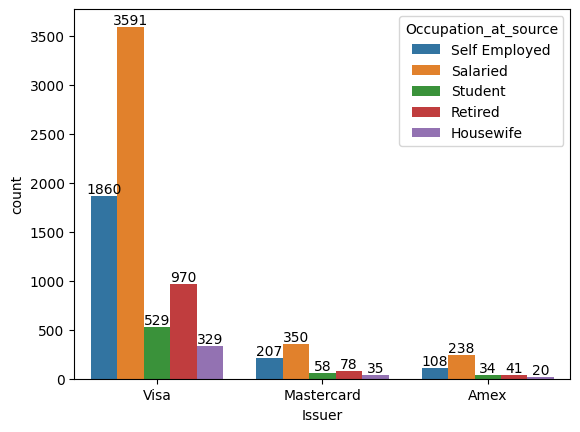

In [47]:
ax=sns.countplot(data=bank,x="Issuer",hue="Occupation_at_source")

for bars in ax.containers:
    ax.bar_label(bars)


# Visa card is best among Salaired and Self employed ( I mean most occupation likes VISA card)

In [49]:
bank.groupby(['Occupation_at_source'])[' avg_spends_l3m '].count()

# here we can see that Salaried customers have spend more in last 3 months than others.

Occupation_at_source
Housewife         384
Retired          1089
Salaried         4179
Self Employed    2175
Student           621
Name:  avg_spends_l3m , dtype: int64

In [50]:
bank.groupby(['Transactor_revolver','Occupation_at_source'])[' avg_spends_l3m '].count()

# here we can see that Salaried are more likely to pay full amount each month.

Transactor_revolver  Occupation_at_source
R                    Housewife                 47
                     Retired                  161
                     Salaried                 656
                     Self Employed            337
                     Student                   94
T                    Housewife                337
                     Retired                  928
                     Salaried                3523
                     Self Employed           1838
                     Student                  527
Name:  avg_spends_l3m , dtype: int64

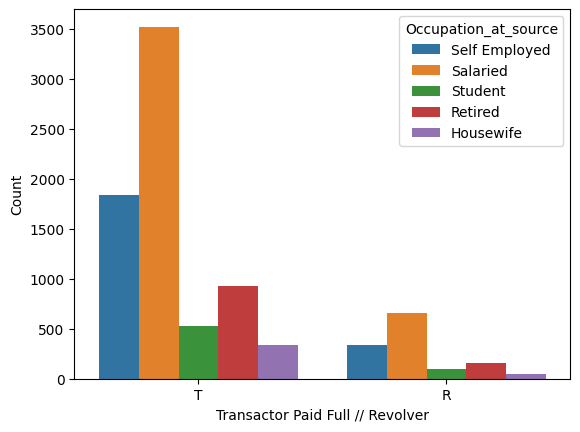

In [51]:
ax=sns.countplot(data=bank,x="Transactor_revolver",hue="Occupation_at_source")
plt.xlabel("Transactor Paid Full // Revolver")
plt.ylabel("Count")
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)


# Salaried Customer pays full amount every month on credit card spendings.

In [104]:
pc=bank.groupby(['Occupation_at_source','widget_products'])['widget_products'].count() 

# counting how many products used by each occupation customers 

In [106]:
pc.sort_values(ascending=False)

# most used widget_product is 7 than 4,5

Occupation_at_source  widget_products
Salaried              7                  566
                      5                  558
                      6                  550
                      4                  543
                      3                  537
                      2                  500
                      1                  463
                      0                  462
Self Employed         7                  315
                      4                  280
                      1                  279
                      6                  278
                      3                  269
                      5                  267
                      2                  261
                      0                  226
Retired               4                  159
                      5                  157
                      0                  135
                      2                  133
                      1                  131
                 

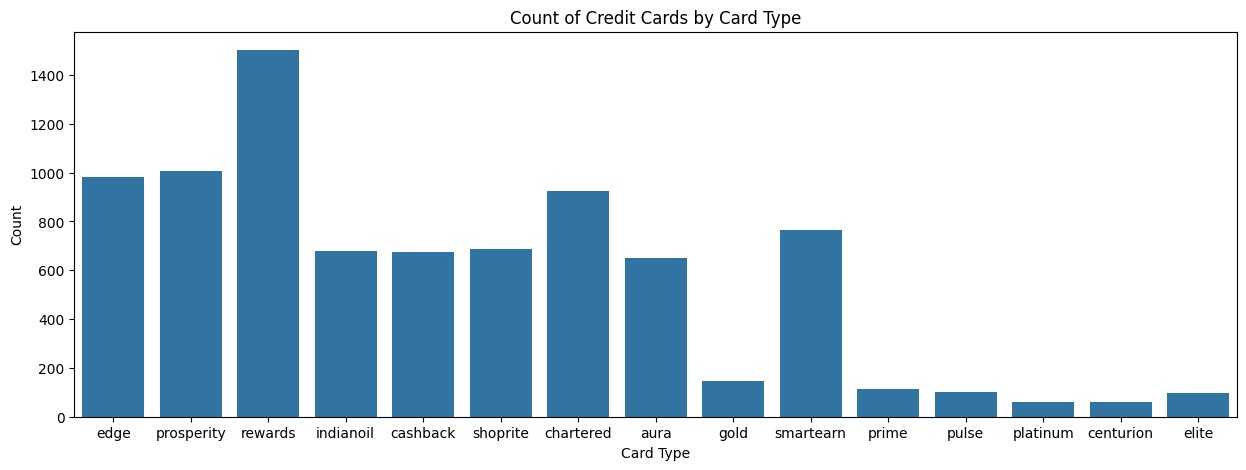

In [80]:
# Example: Bar plot for count of credit cards by card type
plt.figure(figsize=(15, 5))
sns.countplot(data=bank, x='card_type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Count of Credit Cards by Card Type')
plt.show()

# Best credit card types are rewards, prosperity and edge.

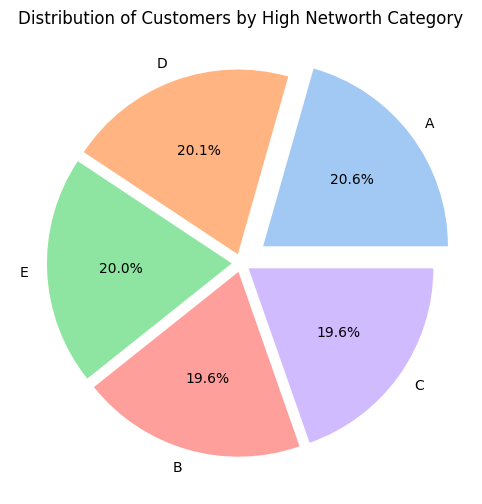

In [78]:
# Example: Pie chart for high_networth distribution
plt.figure(figsize=(8, 6))
bank['high_networth'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), explode=(0.15, 0.05, 0.05, 0.05, 0.05))
plt.title('Distribution of Customers by High Networth Category')
plt.ylabel('')
plt.show()

# Customer with high networth A are more than others

In [94]:
# Filter the data for customers with occupation 'Salaried'
salaried_customers = bank[bank['Occupation_at_source'] == 'Salaried']

# Calculate the average credit card limit among salaried customers
avg_cc_limit_salaried = salaried_customers['cc_limit'].mean()

# Calculate the maximum credit card limit among salaried customers
max_cc_limit_salaried = salaried_customers['cc_limit'].max()

# Display the results
print("Average credit card limit among salaried customers:", avg_cc_limit_salaried)
print("Maximum credit card limit among salaried customers:", max_cc_limit_salaried)


Average credit card limit among salaried customers: 268636.0373295047
Maximum credit card limit among salaried customers: 990000


C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\1317588632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='high_networth', palette='pastel')


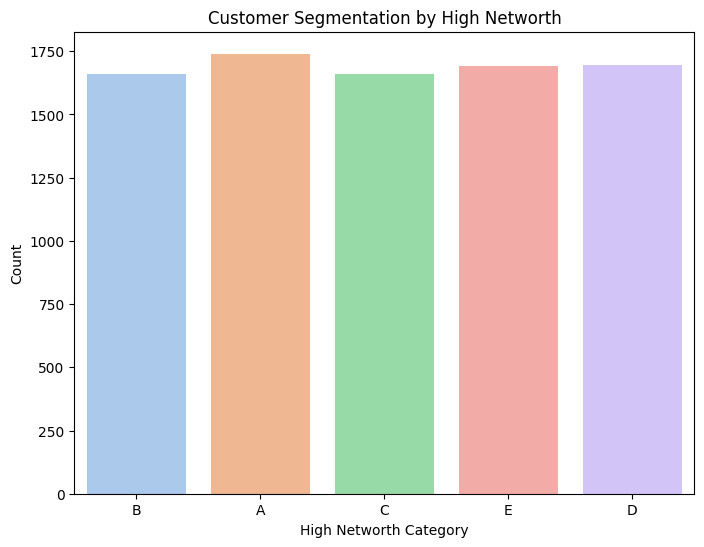

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bank, x='high_networth', palette='pastel')
plt.xlabel('High Networth Category')
plt.ylabel('Count')
plt.title('Customer Segmentation by High Networth')
plt.show()

# Customers with High Networth A are more than Others

C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\2526587724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='hotlist_flag', palette='Set2')


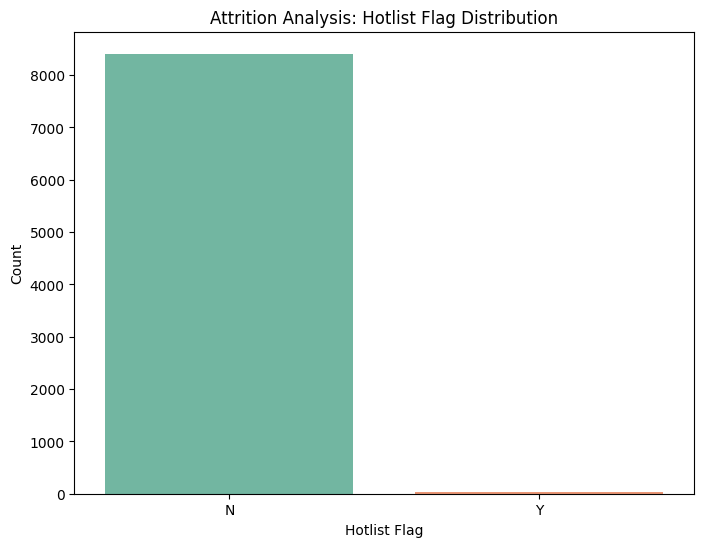

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bank, x='hotlist_flag', palette='Set2')
plt.xlabel('Hotlist Flag')
plt.ylabel('Count')
plt.title('Attrition Analysis: Hotlist Flag Distribution')
plt.show()

# Very less Customers that has their card hotlisted.

In [67]:
bank.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       ' annual_income_at_source ', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       ' avg_spends_l3m ', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

C:\Users\Amit\AppData\Local\Temp\ipykernel_10488\2930913162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='Transactor_revolver', palette='Set2')


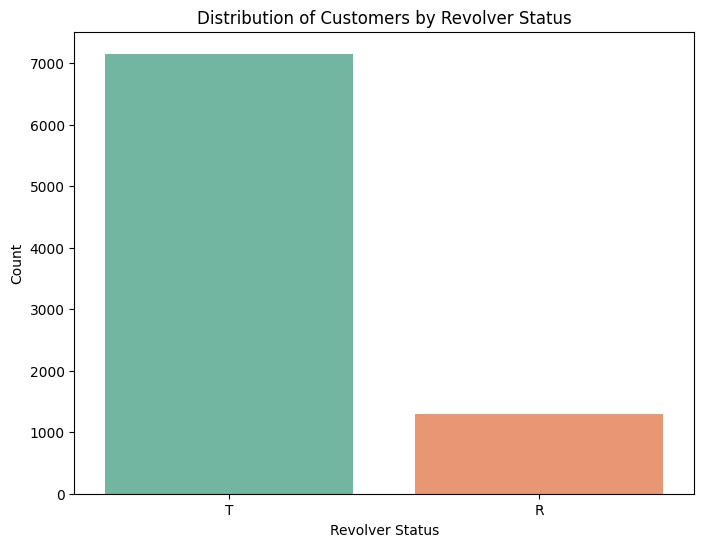

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bank, x='Transactor_revolver', palette='Set2')
plt.xlabel('Revolver Status')
plt.ylabel('Count')
plt.title('Distribution of Customers by Revolver Status')
plt.show()

#Here we can see there are more Customer who pays off their balances in full every month.(Denoted by T)

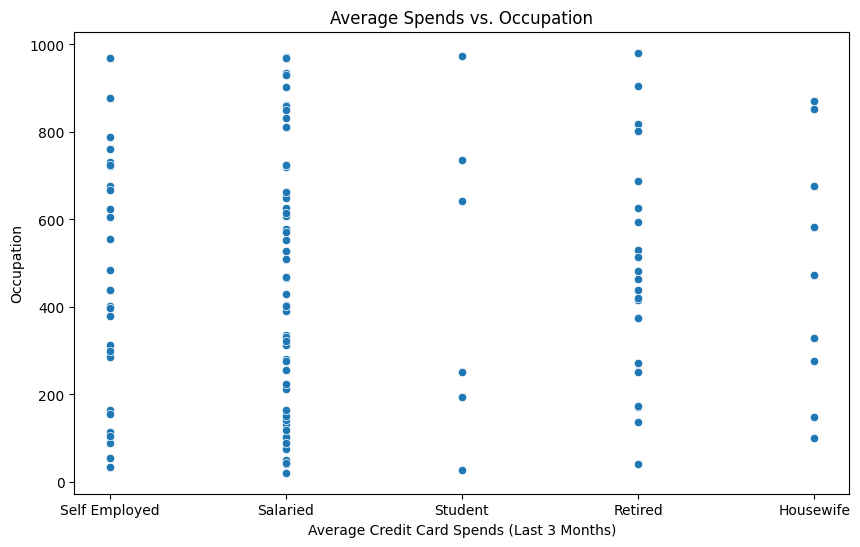

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank, x='Occupation_at_source', y=' avg_spends_l3m ')
plt.xlabel('Average Credit Card Spends (Last 3 Months)')
plt.ylabel('Occupation')
plt.title('Average Spends vs. Occupation')
plt.show()

# here we can see that Salaried customers have spend more in last 3 months

<h1>Conclusion: Salaried and Self Employed Customers are more likely to use VISA Credit Card and they won't attrite. The best card type works here is Rewards, Prosperity and Edge.</h1>